In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [2]:
all_features = pd.read_csv("C:/Users/Allose/Notebook/all_features.csv", index_col=0)
transcriptome_df = pd.read_csv("C:/Users/Allose/Notebook/transcriptome_df.csv", index_col=0)
new_transcriptome_df = pd.read_csv('C:/Users/Allose/Notebook/sep_layer_transcriptome_df.csv', index_col=0)
cre_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/cre_parameter_df.csv", index_col=0)
new_label_df = pd.read_csv("C:/Users/Allose/Notebook/new_label_transcriptome_df.csv", index_col=0)
entrenz_symbol_s = pd.Series.from_csv("C:/Users/Allose/Notebook/entrenz_symbol_s.csv", index_col=0)
f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

parameters = ['gbar_Im', 'gbar_Ih', 'gbar_NaTs', 'gbar_Nap', 'gbar_K_P', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA', 'gamma_CaDynamics', 'decay_CaDynamics', 'soma_g_pas', 'axon_g_pas', 'dend_g_pas', 'apic_g_pas', 'gbar_NaV', 'gbar_Kd', 'gbar_Kv2like', 'gbar_Im_v2']

C:\Users\Allose\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [3]:
cre_layer_dendrite = all_features[['cre_line', 'structure_layer', 'dendrite_type', 'nm_id', 'reconstruction_type']]



In [5]:
cre_layer_dendrite = cre_layer_dendrite[cre_layer_dendrite.dendrite_type != 'sparsely spiny']
cre_layer_dendrite = cre_layer_dendrite[cre_layer_dendrite.cre_line != 'Human']
cre_layer_dendrite = cre_layer_dendrite[cre_layer_dendrite.nm_id > 0]
cre_layer_dendrite.sort_values(by=['structure_layer'])
cre_layer_dendrite.sort_values(by=['dendrite_type'])
cre_layer_dendrite.sort_values(by=['cre_line'])

,cre_line,structure_layer,dendrite_type,nm_id,reconstruction_type
374,Cux2-CreERT2,4,spiny,488461970.0,dendrite-only
1023,Cux2-CreERT2,4,spiny,485513184.0,dendrite-only
991,Cux2-CreERT2,5,spiny,486509232.0,dendrite-only
850,Cux2-CreERT2,4,spiny,486557284.0,dendrite-only
1882,Cux2-CreERT2,4,spiny,486558444.0,dendrite-only
665,Cux2-CreERT2,2/3,spiny,488462783.0,full
623,Cux2-CreERT2,4,spiny,485510685.0,dendrite-only
232,Cux2-CreERT2,4,spiny,487245118.0,dendrite-only
228,Cux2-CreERT2,4,spiny,486512814.0,NaN
563,Cux2-CreERT2,4,spiny,486511108.0,dendrite-only


In [6]:
all_features['cell_type'] = 'False'

In [7]:
for index, row in cre_layer_dendrite.iterrows():
    if row['structure_layer'][0] != '6':
        layer_label = 'L' + row['structure_layer']
    else:
        layer_label = 'L6'
    if row['dendrite_type'] == 'spiny':
        dendrite_label = 'exc'
    else:
        dendrite_label = 'inh'
    all_features.set_value(index, 'cell_type', '{}__{}__{}'.format(row['cre_line'], layer_label, dendrite_label))

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [22]:
new_list = ['cell_type']
new_list.extend(parameters)
new_list.append('cre_line')
new_list.append('dendrite_type')
cell_type_parameter = all_features[new_list]
cell_type_parameter
cell_type_parameter.to_csv('all_features_cell_type.csv')

In [17]:
cell_types_label = []

for item in list(cell_type_parameter['cell_type']):
    if item not in cell_types_label:
        cell_types_label.append(item)

In [18]:
cell_types_label

['False',
 'Sst-IRES-Cre__L5__inh',
 'Scnn1a-Tg2-Cre__L5__exc',
 'Rbp4-Cre_KL100__L5__exc',
 'Rorb-IRES2-Cre__L4__exc',
 'Rorb-IRES2-Cre__L5__exc',
 'Pvalb-IRES-Cre__L5__exc',
 'Scnn1a-Tg3-Cre__L4__exc',
 'Sst-IRES-Cre__L4__inh',
 'Nr5a1-Cre__L4__exc',
 'Htr3a-Cre_NO152__L1__inh',
 'Pvalb-IRES-Cre__L4__inh',
 'Rbp4-Cre_KL100__L4__exc',
 'Cux2-CreERT2__L4__exc',
 'Pvalb-IRES-Cre__L2/3__inh',
 'Htr3a-Cre_NO152__L5__inh',
 'Pvalb-IRES-Cre__L6__inh',
 'Pvalb-IRES-Cre__L5__inh',
 'Ntsr1-Cre_GN220__L6__exc',
 'Sst-IRES-Cre__L2/3__inh',
 'Scnn1a-Tg2-Cre__L5__inh',
 'Scnn1a-Tg2-Cre__L4__exc',
 'Htr3a-Cre_NO152__L2/3__inh',
 'Scnn1a-Tg3-Cre__L5__exc',
 'Htr3a-Cre_NO152__L6__exc',
 'Cux2-CreERT2__L2/3__exc',
 'Rorb-IRES2-Cre__L6__exc',
 'Sst-IRES-Cre__L6__inh',
 'Nr5a1-Cre__L2/3__exc',
 'Scnn1a-Tg3-Cre__L6__inh',
 'Rbp4-Cre_KL100__L6__exc',
 'Cux2-CreERT2__L5__exc',
 'Sst-IRES-Cre__L4__exc',
 'Rorb-IRES2-Cre__L2/3__inh',
 'Rorb-IRES2-Cre__L6__inh',
 'Ntsr1-Cre_GN220__L6__inh',
 'Gad2-IRES-Cre__L

In [19]:
cell_type_parameter_count = pd.DataFrame()

cut = pd.concat([all_features[['cell_type']], all_features[['specimen_id']]], axis = 1)

for parameter in parameters:
    new_cut = pd.concat([cut, all_features[[parameter]]], axis = 1)
    count = new_cut.set_index(["cell_type", "specimen_id"]).count(level="cell_type")
    cell_type_parameter_count = pd.concat([cell_type_parameter_count, count[[parameter]]], axis = 1)

cell_type_parameter_count

,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
cell_type,,,,,,,,,,,,,,,,,,,,
Cux2-CreERT2__L2/3__exc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
Cux2-CreERT2__L4__exc,6,7,6,6,6,7,7,7,7,7,7,7,7,7,7,7,1,1,1,1
Cux2-CreERT2__L5__exc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
False,34,47,34,34,34,47,47,47,47,47,47,47,47,47,47,35,13,13,13,13
Gad2-IRES-Cre__L5__inh,0,2,0,0,0,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2
Htr3a-Cre_NO152__L1__inh,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Htr3a-Cre_NO152__L2/3__inh,4,9,4,4,4,9,9,9,9,9,9,9,9,9,9,0,5,5,5,5
Htr3a-Cre_NO152__L4__inh,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
Htr3a-Cre_NO152__L5__inh,1,4,1,1,1,4,4,4,4,4,4,4,4,4,4,0,3,3,3,3


In [20]:
cell_type_parameter_df = pd.DataFrame()
for parameter in parameters:
    for cre in cell_types_label:
        num = cell_type_parameter_count.loc[cre, parameter]
        cell_type_parameter_df.set_value(cre, parameter, (all_features.loc[all_features['cell_type'] == cre, parameter].sum())/num)
cell_type_parameter_df

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
False,0.001150,1.131504e-03,1.771821,8.032139e-04,2.588023e-02,6.124697e-03,5.393516e-02,0.293400,4.652986e-04,5.833997e-03,0.006807,580.391887,3.846876e-04,0.000406,4.178752e-05,3.460246e-05,0.154139,2.638067e-03,0.046258,1.073016e-03
Sst-IRES-Cre__L5__inh,0.003667,7.823846e-04,0.179580,2.505437e-03,2.573837e-04,1.735245e-02,1.948771e-03,0.515266,4.061996e-04,4.977443e-03,0.016466,589.806032,2.993952e-04,0.000293,3.633705e-05,NaN,0.067870,4.420278e-04,0.036184,3.957838e-03
Scnn1a-Tg2-Cre__L5__exc,0.002086,2.711893e-06,0.792838,1.609114e-04,2.805286e-03,4.140271e-05,3.204150e-04,0.195919,8.794432e-05,2.880208e-03,0.016223,541.655827,1.399600e-04,0.000157,5.823847e-06,1.582100e-04,NaN,NaN,NaN,NaN
Rbp4-Cre_KL100__L5__exc,0.000534,2.894715e-03,0.544406,4.440621e-04,1.809967e-02,3.359073e-02,2.759608e-02,0.124294,2.973421e-04,5.176534e-03,0.010327,534.395111,3.007504e-04,0.000403,1.072020e-04,1.642404e-04,0.318027,4.417846e-03,0.020413,9.973799e-03
Rorb-IRES2-Cre__L4__exc,0.000650,2.351123e-03,0.868131,3.948660e-04,2.431081e-02,5.763485e-03,3.074652e-02,0.161651,5.162957e-04,2.786959e-03,0.002652,688.396666,2.957880e-04,0.000344,9.637341e-05,9.277748e-05,0.265179,1.697097e-04,0.048975,3.379746e-03
Rorb-IRES2-Cre__L5__exc,0.001268,1.185071e-03,0.950335,4.851134e-04,1.201767e-02,6.914746e-03,1.139502e-01,0.214068,5.193591e-04,2.010987e-03,0.004680,519.644874,2.840612e-04,0.000396,1.242889e-04,1.069022e-04,0.236629,9.866088e-06,0.040902,6.058186e-03
Pvalb-IRES-Cre__L5__exc,0.011123,2.785623e-04,0.533701,1.372850e-03,1.750738e-04,1.764824e-07,1.268467e-04,0.344977,2.476127e-04,9.997098e-03,0.010171,969.663813,8.607453e-04,0.000903,2.888286e-06,4.446985e-06,NaN,NaN,NaN,NaN
Scnn1a-Tg3-Cre__L4__exc,0.000741,8.317589e-04,1.289620,4.042210e-04,4.235940e-02,1.590624e-02,9.372560e-03,0.182939,5.916005e-04,4.794315e-03,0.003969,623.604166,3.424224e-04,0.000454,5.495231e-05,1.631388e-04,0.386163,1.786302e-03,0.000014,1.594630e-02
Sst-IRES-Cre__L4__inh,NaN,3.361841e-06,NaN,NaN,NaN,3.932783e-07,4.347225e-03,1.108132,9.832329e-04,9.255704e-10,0.038410,71.625935,2.078964e-04,0.000164,1.000161e-07,NaN,0.026876,8.914005e-11,0.119907,3.385603e-04
Nr5a1-Cre__L4__exc,0.001602,2.014514e-04,0.507800,8.770612e-04,4.536617e-02,1.040859e-02,1.750460e-02,0.126182,4.803084e-04,4.071605e-03,0.004392,668.405290,1.832625e-04,0.000661,4.886277e-05,4.845006e-05,0.137007,1.270005e-03,0.037326,6.659116e-03


In [21]:
cell_type_parameter_df.to_csv('sep_layer_df.csv')

In [13]:
cell_type_parameter_df.sort_index()

,gbar_Im,gbar_Ih,gbar_NaTs,gbar_Nap,gbar_K_P,gbar_K_T,gbar_SK,gbar_Kv3_1,gbar_Ca_HVA,gbar_Ca_LVA,gamma_CaDynamics,decay_CaDynamics,soma_g_pas,axon_g_pas,dend_g_pas,apic_g_pas,gbar_NaV,gbar_Kd,gbar_Kv2like,gbar_Im_v2
Cux2-CreERT2__L2/3__exc,0.000284,4.314651e-08,0.683882,1.043189e-06,3.605217e-02,1.438869e-09,9.437496e-04,0.078343,5.064647e-05,1.926765e-03,0.005385,902.507759,4.203814e-06,0.000341,1.003615e-07,6.416457e-05,NaN,NaN,NaN,NaN
Cux2-CreERT2__L4__exc,0.001720,1.266274e-04,1.270381,4.222543e-04,2.358250e-02,5.430911e-03,7.820914e-03,0.132682,2.704705e-04,2.608717e-03,0.010187,674.454861,4.746624e-04,0.000371,7.156874e-05,6.647229e-05,0.345467,1.322892e-02,0.000002,9.900757e-03
Cux2-CreERT2__L5__exc,0.000902,8.386369e-05,0.417415,8.231144e-04,4.136350e-02,2.480364e-03,3.207819e-02,0.343501,8.946524e-04,7.692528e-03,0.000103,748.167435,5.259503e-04,0.000509,2.963838e-05,3.306172e-06,NaN,NaN,NaN,NaN
False,0.001150,1.131504e-03,1.771821,8.032139e-04,2.588023e-02,6.124697e-03,5.393516e-02,0.293400,4.652986e-04,5.833997e-03,0.006807,580.391887,3.846876e-04,0.000406,4.178752e-05,3.460246e-05,0.154139,2.638067e-03,0.046258,1.073016e-03
Gad2-IRES-Cre__L5__inh,NaN,4.879727e-04,NaN,NaN,NaN,3.201234e-02,1.253179e-04,1.818406,4.795989e-04,7.290051e-03,0.008271,313.267829,2.132047e-04,0.000074,1.941620e-06,NaN,0.099432,1.958078e-08,0.234636,8.393492e-03
Htr3a-Cre_NO152__L1__inh,NaN,2.642497e-08,NaN,NaN,NaN,2.987296e-06,3.398848e-13,0.045804,1.819265e-07,4.463811e-03,0.001665,799.192357,7.565491e-04,0.000546,9.144134e-04,NaN,0.060625,1.155262e-07,0.000003,2.277315e-03
Htr3a-Cre_NO152__L2/3__inh,0.001080,7.628850e-04,0.452069,1.564326e-03,6.017358e-02,2.788123e-02,6.735612e-02,0.235402,3.621799e-04,2.058590e-03,0.013284,327.152609,3.273452e-04,0.000578,1.658285e-04,NaN,0.052717,2.179481e-05,0.030079,2.566034e-03
Htr3a-Cre_NO152__L4__inh,NaN,7.483146e-04,NaN,NaN,NaN,6.209996e-07,2.123536e-02,0.142927,2.946788e-04,3.285403e-03,0.000192,533.545741,7.969411e-04,0.000590,3.549250e-07,NaN,0.056102,1.751991e-04,0.000040,2.551972e-03
Htr3a-Cre_NO152__L5__inh,0.009812,1.853270e-04,0.670528,6.045610e-08,2.730513e-03,3.955527e-02,6.433538e-04,0.638604,6.185811e-04,3.395834e-03,0.018487,777.784361,2.784004e-04,0.000195,1.867627e-05,NaN,0.076135,8.568232e-06,0.016748,6.407114e-03
Htr3a-Cre_NO152__L6__exc,0.003383,6.793627e-04,0.477561,1.988422e-04,9.098079e-09,8.187409e-08,1.801773e-03,0.360560,9.035676e-05,1.669806e-03,0.006457,477.531283,2.975876e-04,0.000005,1.110426e-07,9.360292e-07,NaN,NaN,NaN,NaN


In [13]:
cre_parameter_df_spec = cell_type_parameter_df[['gbar_Kv3_1']]
cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec['gbar_Kv3_1'].notna()]
filtered_cre = list(cre_conductance_filtered.index)
    
gene_id = entrenz_symbol_s[entrenz_symbol_s == 'Kcnc1'].index[0]
gene_spec = new_transcriptome_df.loc[gene_id]
gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
graph_spec = pd.concat([cre_conductance_filtered, gene_spec], axis = 1)

graph_spec = graph_spec[graph_spec['gbar_Kv3_1'].notna()]
graph_spec = graph_spec[graph_spec[16502].notna()]

graph_spec

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys
C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,gbar_Kv3_1,16502
Htr3a-Cre_NO152__L6__exc,0.360560,2.874626
Scnn1a-Tg3-Cre__L4__exc,0.182939,4.258513
Sst-IRES-Cre__L2/3__inh,0.261797,7.797611


In [22]:
cre_conductance_filtered.sort_index()

,gbar_Kv3_1
Cux2-CreERT2__L2/3__exc,0.078343
Cux2-CreERT2__L4__exc,0.132682
Cux2-CreERT2__L5__exc,0.343501
False,0.293400
Gad2-IRES-Cre__L5__inh,1.818406
Htr3a-Cre_NO152__L1__inh,0.045804
Htr3a-Cre_NO152__L2/3__inh,0.235402
Htr3a-Cre_NO152__L4__inh,0.142927
Htr3a-Cre_NO152__L5__inh,0.638604
Htr3a-Cre_NO152__L6__exc,0.360560


In [15]:
new_labels = ['Gad2-IRES-Cre__L5__inh',
 'Sst-IRES-Cre__L6__inh',
 'Nos1-CreERT2|Sst-IRES-FlpO__L5__inh',
 'Nos1-CreERT2|Sst-IRES-FlpO__L6__inh',
 'Oxtr-T2A-Cre__L5__inh',
  'Oxtr-T2A-Cre__L6__inh',
 'Rbp4-Cre_KL100__L4__exc',
 'Sim1-Cre_KJ18__L4__exc',
 'Sim1-Cre_KJ18__L5__exc',
 'Sim1-Cre_KJ18__L6__exc',
 'Chrna2-Cre_OE25__L5__inh',
 'Tlx3-Cre_PL56__L4__exc',
              'Tlx3-Cre_PL56__L5__exc',
              'Tlx3-Cre_PL56__L6__exc',
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5__inh',
              'Chrna2-Cre_OE25|Pvalb-T2A-Dre__L6__inh',
 'Chat-IRES-Cre-neo__L2/3__inh',
 'Htr3a-Cre_NO152__L4__inh',
 'Sst-IRES-Cre__L4__inh',
 'Pvalb-IRES-Cre__L4__inh',
 'Htr3a-Cre_NO152|Pvalb-T2A-Dre__L5__inh',
              'Htr3a-Cre_NO152|Pvalb-T2A-Dre__L6__inh',
 'Vip-IRES-Cre__L6__inh',
 'Vip-IRES-Cre__L5__inh',
 'Penk-IRES2-Cre-neo__L5__exc',
              'Penk-IRES2-Cre-neo__L6__exc',
 'Ndnf-IRES2-dgCre__L1__inh',
 'Chrna2-Cre_OE25__L6__inh',
 'Htr3a-Cre_NO152__L2/3__inh',
 'Nos1-CreERT2__L1__inh',
              'Nos1-CreERT2__L2__inh',
              'Nos1-CreERT2__L3__inh',
              'Nos1-CreERT2__L4__inh',
 'Nr5a1-Cre__L4__exc',
 'Pvalb-IRES-Cre__L6__inh',
 'Ntsr1-Cre_GN220__L6__exc',
 'Vip-IRES-Cre__L4__inh',
 'Pvalb-IRES-Cre__L5__inh',
 'Nkx2-1-CreERT2__L5__inh',
              'Nkx2-1-CreERT2__L6__inh',
 'Chat-IRES-Cre-neo__L4__inh',
 'Gad2-IRES-Cre__L1__inh',
 'Vip-IRES-Cre__L1__inh',
              'Vip-IRES-Cre__L2/3__inh',
 'Vipr2-IRES2-Cre__L1-L6__inh',
              'Vipr2-IRES2-Cre__L2__inh',
              'Vipr2-IRES2-Cre__L3__inh',
              'Vipr2-IRES2-Cre__L4__inh',
              'Vipr2-IRES2-Cre__L5__inh',
              'Vipr2-IRES2-Cre__L6__inh',
 'Nkx2-1-CreERT2__L1__inh',
              'Nkx2-1-CreERT2__L2__inh',
              'Nkx2-1-CreERT2__L3__inh',
              'Nkx2-1-CreERT2__L4__inh',
 'Scnn1a-Tg2-Cre__L4__exc',
 'Sst-IRES-Cre__L1__inh',
              'Sst-IRES-Cre__L2/3__inh',
 'Oxtr-T2A-Cre__L1__inh',
              'Oxtr-T2A-Cre__L2__inh',
              'Oxtr-T2A-Cre__L3__inh',
              'Oxtr-T2A-Cre__L4__inh',
 'Rbp4-Cre_KL100__L5__exc',
 'Htr3a-Cre_NO152__L5__exc',
              'Htr3a-Cre_NO152__L6__exc',
 'Ctgf-T2A-dgCre__L6__exc',
 'Vipr2-IRES2-Cre__L1__exc',
              'Vipr2-IRES2-Cre__L2__exc',
              'Vipr2-IRES2-Cre__L3__exc',
              'Vipr2-IRES2-Cre__L4__exc',
              'Vipr2-IRES2-Cre__L5__exc',
              'Vipr2-IRES2-Cre__L6__exc',
 'Nos1-CreERT2__L5__inh',
              'Nos1-CreERT2__L6__inh',
 'Htr3a-Cre_NO152__L6__inh',
 'Scnn1a-Tg3-Cre__L2/3__exc',
              'Scnn1a-Tg3-Cre__L4__exc',
 'Sst-IRES-Cre__L5__inh',
 'Oxtr-T2A-Cre__L5__exc',
              'Oxtr-T2A-Cre__L6__exc',
 'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L1__inh',
              'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L2__inh',
              'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L3__inh',
              'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre__L4__inh',
 'Esr2-IRES2-Cre__L5__exc',
              'Esr2-IRES2-Cre__L6__exc',
 'Pvalb-IRES-Cre__L2/3__inh',
 'Htr3a-Cre_NO152__L5__inh']

new_labels

['Gad2-IRES-Cre__L5__inh',
 'Sst-IRES-Cre__L6__inh',
 'Nos1-CreERT2|Sst-IRES-FlpO__L5__inh',
 'Nos1-CreERT2|Sst-IRES-FlpO__L6__inh',
 'Oxtr-T2A-Cre__L5__inh',
 'Oxtr-T2A-Cre__L6__inh',
 'Rbp4-Cre_KL100__L4__exc',
 'Sim1-Cre_KJ18__L4__exc',
 'Sim1-Cre_KJ18__L5__exc',
 'Sim1-Cre_KJ18__L6__exc',
 'Chrna2-Cre_OE25__L5__inh',
 'Tlx3-Cre_PL56__L4__exc',
 'Tlx3-Cre_PL56__L5__exc',
 'Tlx3-Cre_PL56__L6__exc',
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5__inh',
 'Chrna2-Cre_OE25|Pvalb-T2A-Dre__L6__inh',
 'Chat-IRES-Cre-neo__L2/3__inh',
 'Htr3a-Cre_NO152__L4__inh',
 'Sst-IRES-Cre__L4__inh',
 'Pvalb-IRES-Cre__L4__inh',
 'Htr3a-Cre_NO152|Pvalb-T2A-Dre__L5__inh',
 'Htr3a-Cre_NO152|Pvalb-T2A-Dre__L6__inh',
 'Vip-IRES-Cre__L6__inh',
 'Vip-IRES-Cre__L5__inh',
 'Penk-IRES2-Cre-neo__L5__exc',
 'Penk-IRES2-Cre-neo__L6__exc',
 'Ndnf-IRES2-dgCre__L1__inh',
 'Chrna2-Cre_OE25__L6__inh',
 'Htr3a-Cre_NO152__L2/3__inh',
 'Nos1-CreERT2__L1__inh',
 'Nos1-CreERT2__L2__inh',
 'Nos1-CreERT2__L3__inh',
 'Nos1-CreERT2__L4__inh'

In [15]:
def graph_conductance_exp(parameter_type, gene_symbol):
    cre_parameter_df_spec = cell_type_parameter_df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = new_transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    plt.figure(figsize=(8, 8))
    plt.title('Correspondence of {} conductance \n and {} gene expression by Cre driver line'.format(parameter_type, gene_symbol))
    
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, data=graph_spec)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")

    ax.set(xlabel='Kcnc1 Transcriptomic Gene Expression', ylabel='g_Kv3.1 Conductance')

C:\Users\Allose\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
No handles with labels found to put in legend.


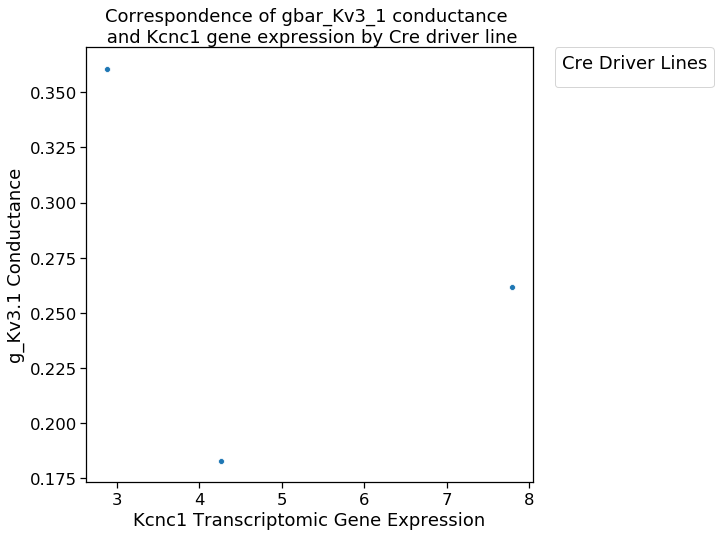

In [16]:
graph_conductance_exp('gbar_Kv3_1', 'Kcnc1')